In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import to_rgba

In [34]:
df = pd.read_csv('resultados.csv')

In [35]:
df.dtypes

Study                   object
LLM                     object
Request                 object
Prompt                   int64
Screen                  object
Layout                  object
Context                  int64
Touch Target             int64
Contrast               float64
Item Description         int64
Text Size                int64
Hidden Text              int64
Item Label               int64
Item Type Label          int64
Editable Item Label      int64
Clickable Item           int64
Total                    int64
dtype: object

In [36]:
# Preenchendo valores NaN com 0 antes de converter para 'int'
df[df.select_dtypes(include=['float64']).columns] = df.select_dtypes(include=['float64']).fillna(0).apply(lambda x: x.astype('int64'))

In [37]:
df.dtypes

Study                  object
LLM                    object
Request                object
Prompt                  int64
Screen                 object
Layout                 object
Context                 int64
Touch Target            int64
Contrast                int64
Item Description        int64
Text Size               int64
Hidden Text             int64
Item Label              int64
Item Type Label         int64
Editable Item Label     int64
Clickable Item          int64
Total                   int64
dtype: object

In [38]:
df.tail()

,Study,LLM,Request,Prompt,Screen,Layout,Context,Touch Target,Contrast,Item Description,Text Size,Hidden Text,Item Label,Item Type Label,Editable Item Label,Clickable Item,Total
283,Study 4,GitHub Copilot,NReq,2,SIDEBAR MENU,Chat-JCR,0,0,0,0,0,1,0,0,0,0,1
284,Study 4,GitHub Copilot,NReq,3,SIDEBAR MENU,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
285,Study 4,GitHub Copilot,AccessReq,1,SIDEBAR MENU,Chat-JCR,0,0,6,0,0,0,0,0,0,0,6
286,Study 4,GitHub Copilot,AccessReq,2,SIDEBAR MENU,Chat-JCR,0,0,0,0,0,1,0,0,0,0,1
287,Study 4,GitHub Copilot,AccessReq,3,SIDEBAR MENU,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0


In [39]:
order_screen = ['LOGIN', 'PRODUCT', 'REGISTRATION', 'TO-DO LIST', 'PROFILE', 'MUSIC PLAYER', 'SIDEBAR MENU']
order_request = ['NReq', 'AccessReq']
color_dict_llm = {'ChatGPT-3.5': to_rgba('red', 0),
              'ChatGPT-4o': to_rgba('red', 0),
              'Sabiá-3': to_rgba('red', 0)}
color_dict_screen = {'LOGIN': to_rgba('blue', 0),
              'PRODUCT': to_rgba('blue', 0),
              'REGISTRATION': to_rgba('blue', 0),
              'TO-DO LIST': to_rgba('blue', 0),
              'PROFILE': to_rgba('blue', 0),
              'MUSIC PLAYER': to_rgba('blue', 0),
              'SIDEBAR MENU': to_rgba('blue', 0)}
color_dict_request = {'NReq': to_rgba('red', 0),
              'AccessReq': to_rgba('red', 0)}

In [40]:
sns.set_theme(style="whitegrid")

## Estudo 1

In [41]:
df_estudo1 = df[df['Study'] == 'Study 1']
df_estudo1.tail()

,Study,LLM,Request,Prompt,Screen,Layout,Context,Touch Target,Contrast,Item Description,Text Size,Hidden Text,Item Label,Item Type Label,Editable Item Label,Clickable Item,Total
115,Study 1,ChatGPT-3.5,NReq,2,SIDEBAR MENU,Chat-JCR,0,0,1,0,0,0,0,0,0,0,1
116,Study 1,ChatGPT-3.5,NReq,3,SIDEBAR MENU,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
117,Study 1,ChatGPT-3.5,AccessReq,1,SIDEBAR MENU,Chat-JCR,0,1,0,0,0,0,0,0,0,0,1
118,Study 1,ChatGPT-3.5,AccessReq,2,SIDEBAR MENU,Chat-JCR,0,0,1,0,0,0,0,0,0,0,1
119,Study 1,ChatGPT-3.5,AccessReq,3,SIDEBAR MENU,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0


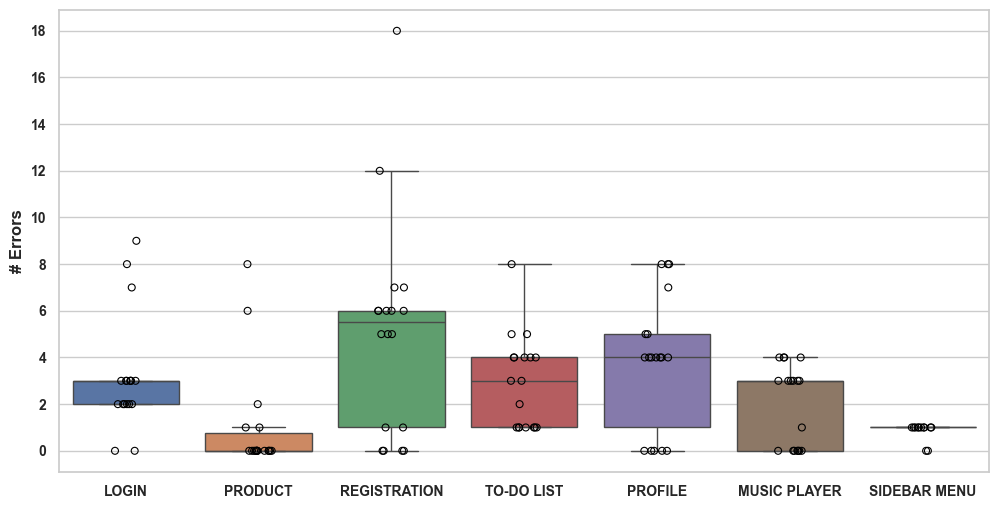

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_estudo1, x='Screen', y='Total', hue='Screen', showfliers=False)
sns.stripplot(data=df_estudo1, x='Screen', y='Total', palette=color_dict_screen, hue='Screen', edgecolor='black', linewidth=.8)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('')
plt.xlabel('')
plt.ylabel('# Errors', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

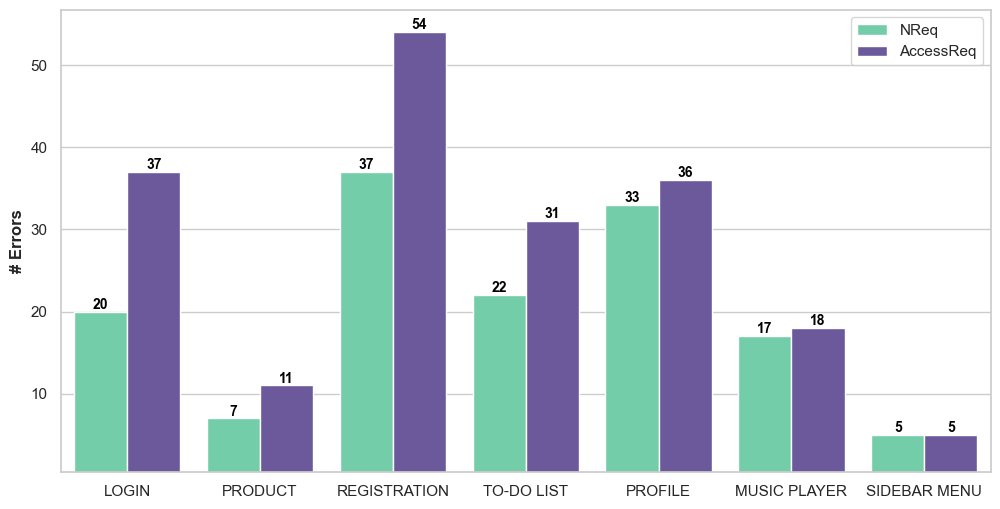

In [43]:
df_t = df_estudo1.groupby(['Request', 'Screen'])['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_t, x='Screen', y='Total', hue='Request', palette=['#63dcab', '#674ea7'], order=order_screen, hue_order=order_request)

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=10, fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto

# Ajustando os limites do eixo y
ax.set_ylim(0.5, ax.get_ylim()[1])

plt.xlabel('')
plt.ylabel('# Errors', fontsize=12, fontweight='bold')
plt.legend(title='')
plt.show()

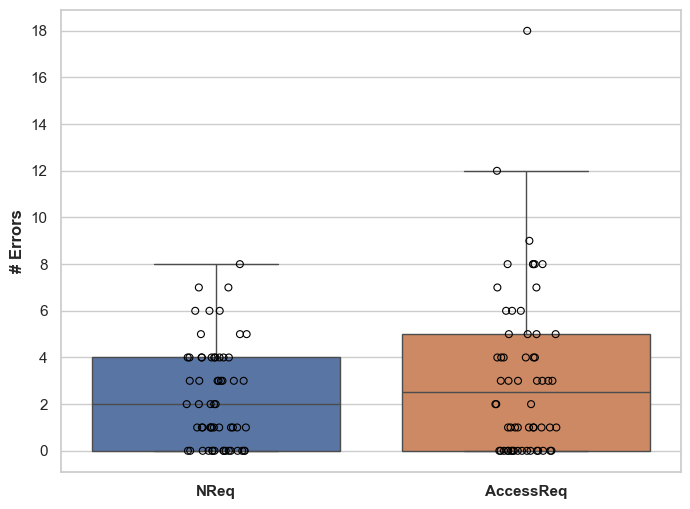

In [120]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_estudo1, x='Request', y='Total', hue='Request', showfliers=False)
sns.stripplot(data=df_estudo1, x='Request', y='Total', palette=color_dict_request, hue='Request', edgecolor='black', linewidth=.8)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.xticks(fontweight='bold', fontfamily='Arial')
plt.ylabel('# Errors', fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)
c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)


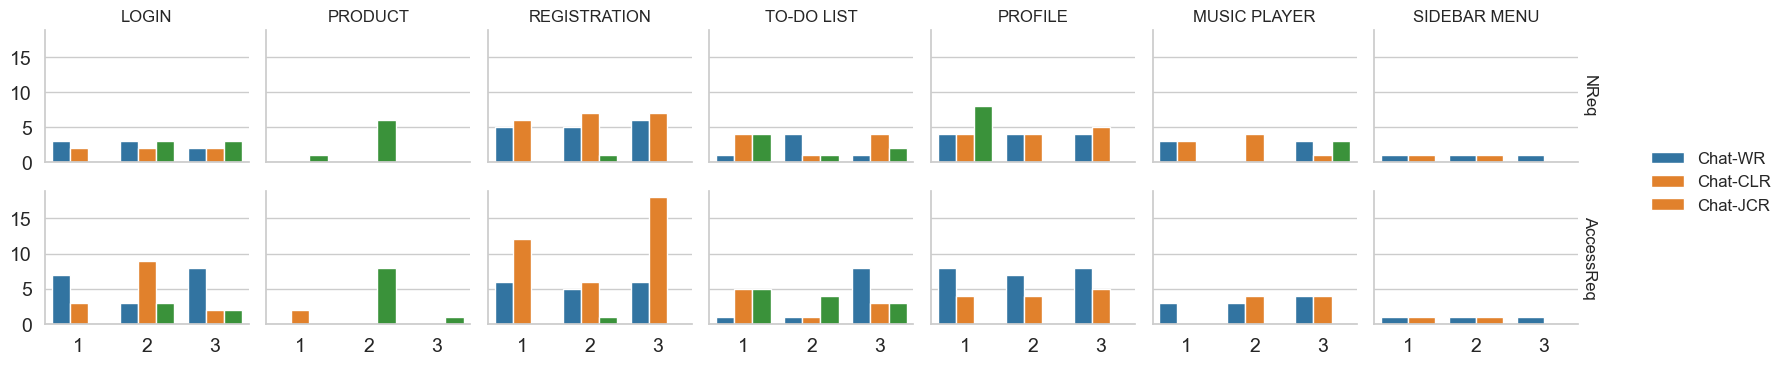

In [44]:
# Criando o grid de gráficos de barras
g = sns.FacetGrid(df_estudo1, row="Request", col="Screen", margin_titles=True, height=2, aspect=1.2)
g.map_dataframe(sns.barplot, x="Prompt", y="Total", hue="Layout", palette=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Ajustando a legenda
g.add_legend(title="", title_fontsize='13', prop={'size': 12})

# Ajustando os títulos dos eixos
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Ajustando a rotação dos rótulos do eixo x
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
        label.set_fontsize(14)
    for label in ax.get_yticklabels():
        label.set_fontsize(14)

# Ajustando o layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('')
# Exibindo o gráfico
plt.show()

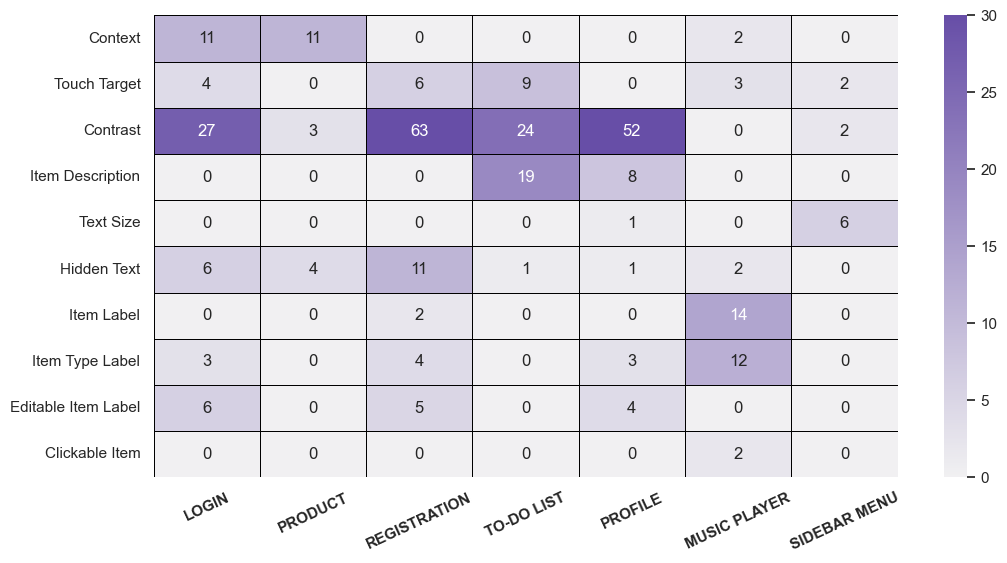

In [ ]:
data1 = df_estudo1.pivot_table(index='Screen', values=['Context', 'Touch Target', 'Contrast', 'Item Description', 'Text Size', 'Hidden Text', 'Item Label', 'Item Type Label', 'Editable Item Label', 'Clickable Item'], aggfunc='sum', sort=False)

plt.figure(figsize=(12, 6))
sns.heatmap(data1.T, annot=True, fmt='d', cmap=sns.light_palette("#674ea7", as_cmap=True), linewidths=.5, linecolor='black', vmax=30)
plt.title('')
plt.xlabel('')
plt.xticks(fontweight='bold', rotation=25)
plt.show()

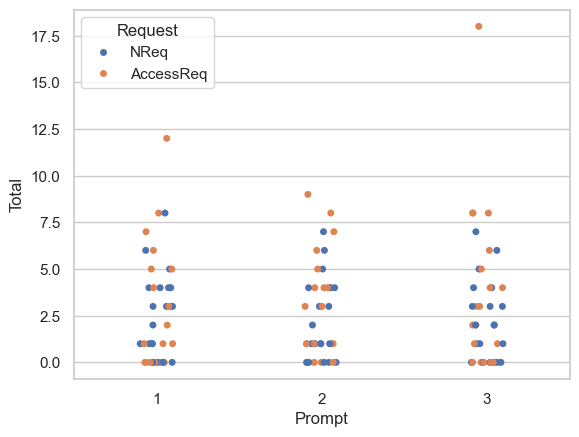

In [46]:
sns.stripplot(data=df_estudo1, x='Prompt', y='Total', hue='Request')
plt.show()

## Estudo 2

In [47]:
df_estudo2 = df[(df['Study'] == 'Study 2') | ((df['Study'] == 'Study 1') & (df['Layout'] == 'Chat-JCR'))]
df_estudo2.head()

,Study,LLM,Request,Prompt,Screen,Layout,Context,Touch Target,Contrast,Item Description,Text Size,Hidden Text,Item Label,Item Type Label,Editable Item Label,Clickable Item,Total
12,Study 1,ChatGPT-3.5,NReq,1,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
13,Study 1,ChatGPT-3.5,NReq,2,LOGIN,Chat-JCR,3,0,0,0,0,0,0,0,0,0,3
14,Study 1,ChatGPT-3.5,NReq,3,LOGIN,Chat-JCR,3,0,0,0,0,0,0,0,0,0,3
15,Study 1,ChatGPT-3.5,AccessReq,1,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
16,Study 1,ChatGPT-3.5,AccessReq,2,LOGIN,Chat-JCR,3,0,0,0,0,0,0,0,0,0,3


In [108]:
# Transformando os dados para o formato longo (melt) para facilitar o gráfico
df_melted_e2 = df_estudo2.melt(id_vars=["LLM", "Request", 'Screen'], value_vars='Total', value_name="Valor")

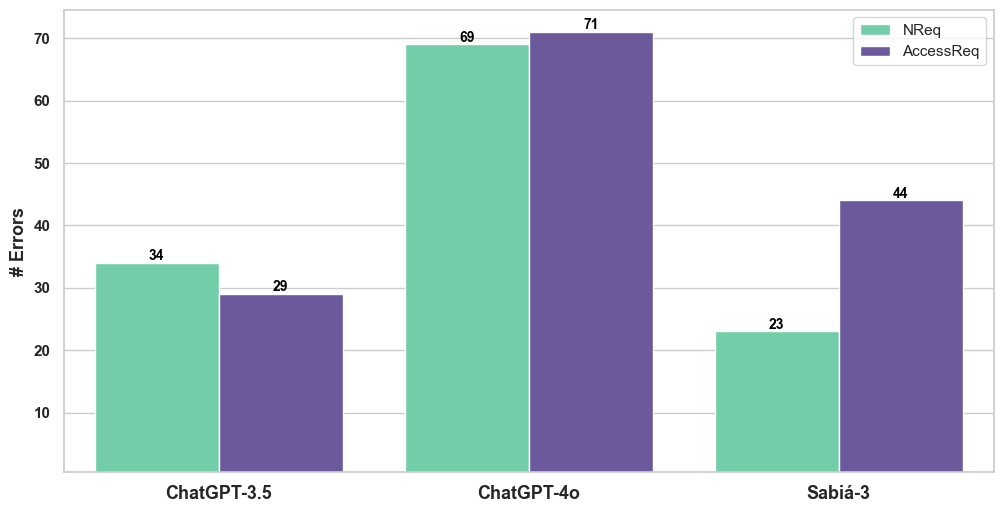

In [110]:
# Somando os valores de erros para cada LLM e Request
df_melted_sum = df_melted_e2.groupby(["LLM", "Request"]).sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melted_sum, x='LLM', y='Valor', hue='Request', palette=['#63dcab', '#674ea7'], hue_order=order_request)

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=10, fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto

# Ajustando os limites do eixo y
ax.set_ylim(0.5, ax.get_ylim()[1])

plt.xlabel('')
plt.ylabel('# Errors', fontsize=13, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=13, fontweight='bold', fontfamily='Arial')
plt.yticks(fontweight='bold', fontfamily='Arial')
plt.legend(title='')
plt.show()

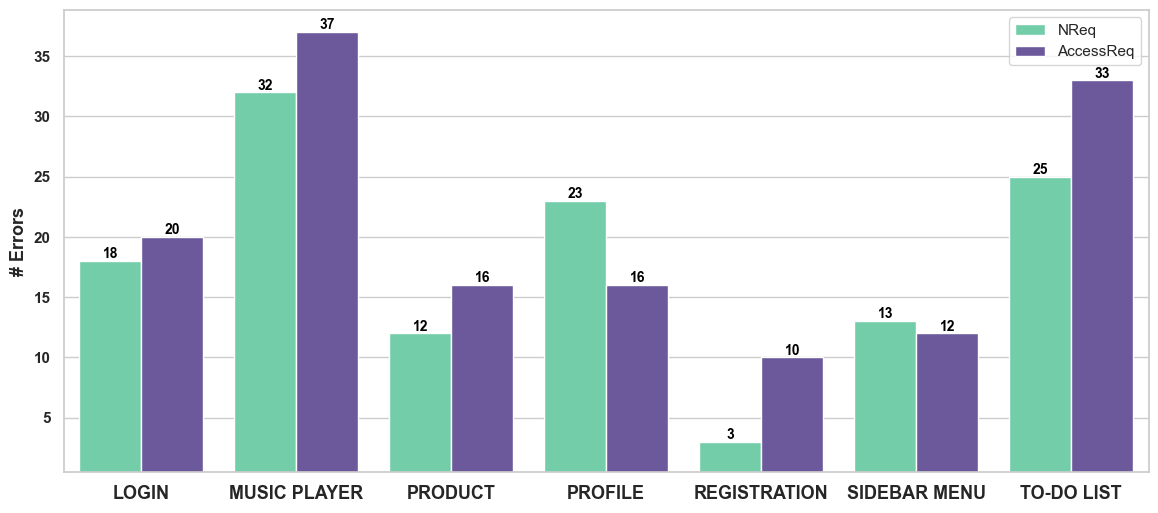

In [133]:
# Somando os valores de erros para cada LLM e Request
df_melted_sum = df_melted_e2.groupby(["Screen", "Request"]).sum().reset_index()

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_melted_sum, x='Screen', y='Valor', hue='Request', palette=['#63dcab', '#674ea7'], hue_order=order_request)

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=10, fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto

# Ajustando os limites do eixo y
ax.set_ylim(0.5, ax.get_ylim()[1])

plt.xlabel('')
plt.ylabel('# Errors', fontsize=13, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=13, fontweight='bold', fontfamily='Arial')
plt.yticks(fontweight='bold', fontfamily='Arial')
plt.legend(title='')
plt.show()

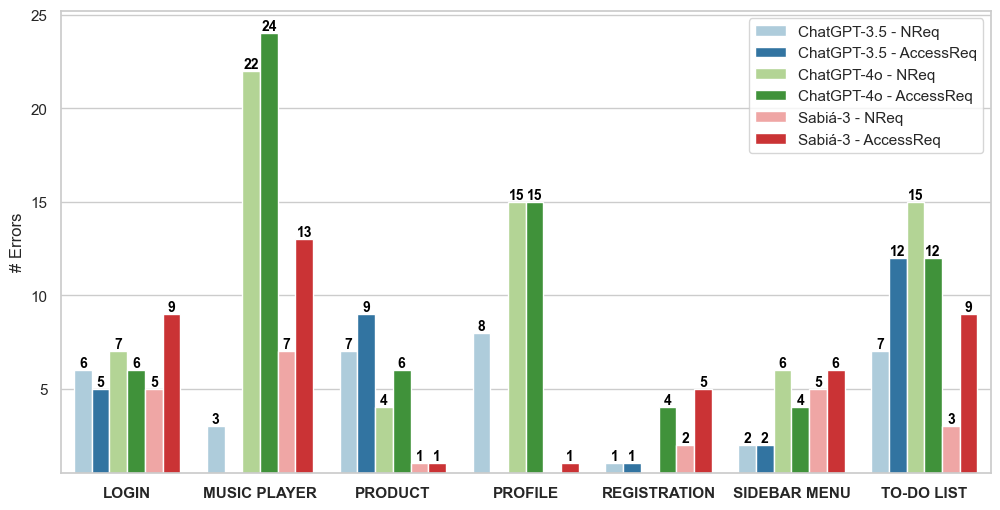

In [111]:
# Ajustando o dataframe para separar NReq e AccessReq corretamente no gráfico
df_new_melt = df_melted_e2.copy()
df_new_melt["Métrica_Modelo"] = df_new_melt["LLM"] + " - " + df_new_melt["Request"]

# Somando os valores
df_new_melt = df_new_melt.groupby(["LLM", "Request", "Screen", "Métrica_Modelo"]).sum().reset_index()

# Criando o gráfico corrigido
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_new_melt, x="Screen", y="Valor", hue="Métrica_Modelo", palette='Paired', dodge=True, errorbar=None, hue_order=['ChatGPT-3.5 - NReq', 'ChatGPT-3.5 - AccessReq', 'ChatGPT-4o - NReq', 'ChatGPT-4o - AccessReq', 'Sabiá-3 - NReq', 'Sabiá-3 - AccessReq'])

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=10, fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto

# Ajustando os limites do eixo y
ax.set_ylim(0.5, ax.get_ylim()[1])

# Ajustando rótulos
plt.xticks(fontweight='bold')
plt.xlabel("")
plt.ylabel("# Errors")
plt.title("")
plt.legend(title="")

# Exibir o gráfico
plt.show()

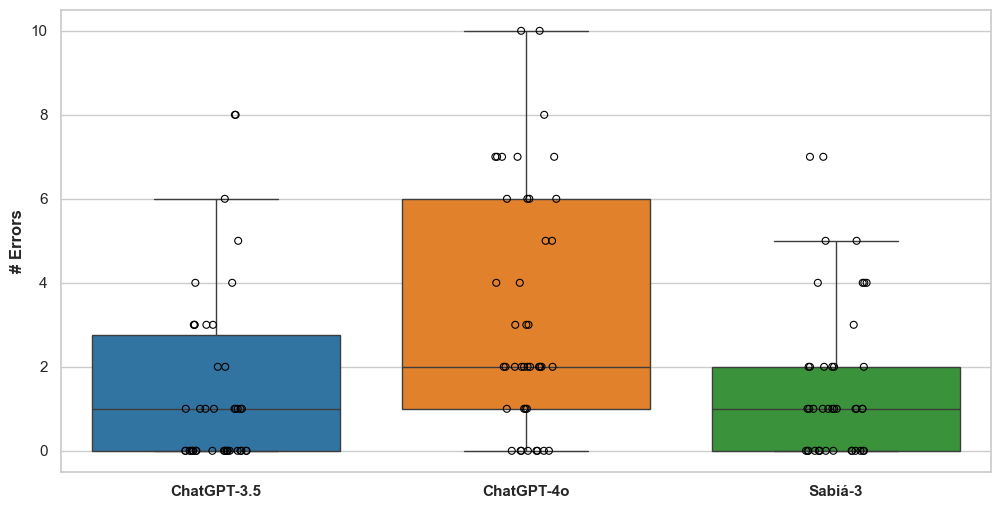

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_estudo2, x='LLM', y='Total', hue='LLM', palette=['#1f77b4', '#ff7f0e', '#2ca02c'], showfliers=False)

sns.stripplot(data=df_estudo2, x='LLM', y='Total', palette=color_dict_llm, hue='LLM', edgecolor='black', linewidth=.8)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.xticks(fontweight='bold', fontfamily='Arial')
plt.ylabel('# Errors', fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

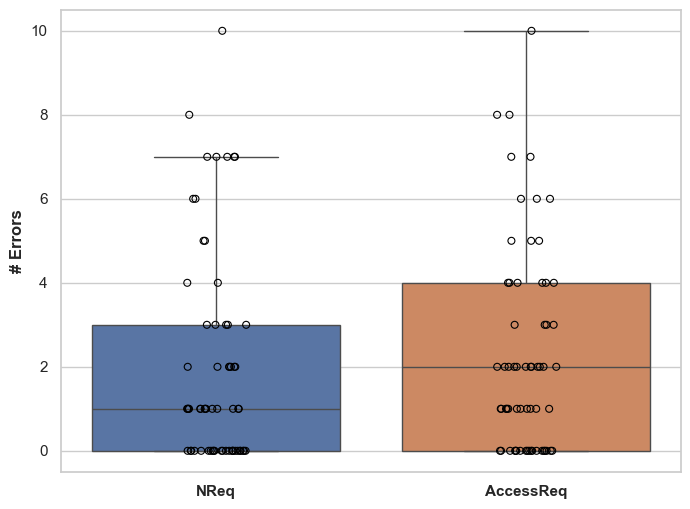

In [119]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_estudo2, x='Request', y='Total', hue='Request', showfliers=False)
sns.stripplot(data=df_estudo2, x='Request', y='Total', palette=color_dict_request, hue='Request', edgecolor='black', linewidth=.8)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.xticks(fontweight='bold', fontfamily='Arial')
plt.ylabel('# Errors', fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

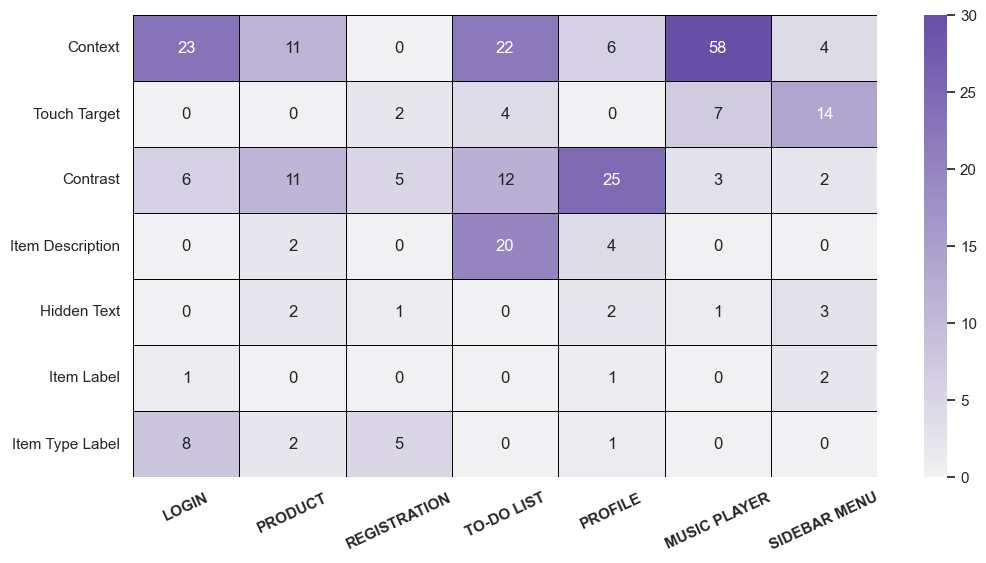

In [113]:
data2 = df_estudo2.pivot_table(index='Screen', values=['Context', 'Touch Target', 'Contrast', 'Item Description', 'Hidden Text', 'Item Label', 'Item Type Label'], aggfunc='sum', sort=False)

plt.figure(figsize=(12, 6))
sns.heatmap(data2.T, annot=True, fmt='d', cmap=sns.light_palette("#674ea7", as_cmap=True), linewidths=.5, linecolor='black', vmax=30)
plt.title('')
plt.xlabel('')
plt.xticks(fontweight='bold', rotation=25)
plt.show()

## Estudo 3

In [50]:
df_estudo3 = df[df['Study'] == 'Study 3']
df_estudo3.head()

,Study,LLM,Request,Prompt,Screen,Layout,Context,Touch Target,Contrast,Item Description,Text Size,Hidden Text,Item Label,Item Type Label,Editable Item Label,Clickable Item,Total
204,Study 3,ChatGPT-4o,NReq,1,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
205,Study 3,ChatGPT-4o,NReq,2,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
206,Study 3,ChatGPT-4o,NReq,3,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
207,Study 3,ChatGPT-4o,AccessReq,1,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
208,Study 3,ChatGPT-4o,AccessReq,2,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0


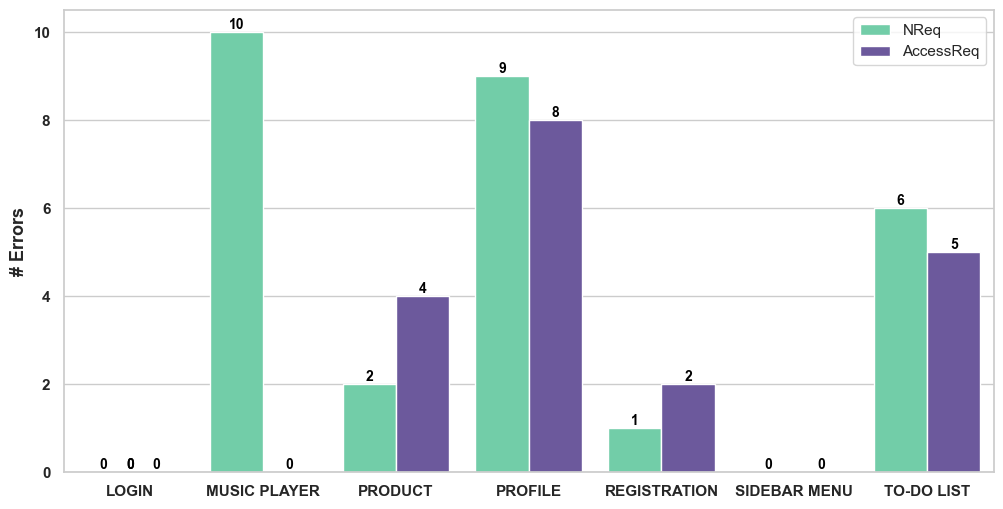

In [51]:
df_t3 = df_estudo3.groupby(['Request', 'Screen'])['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_t3, x='Screen', y='Total', hue='Request', palette=['#63dcab', '#674ea7'], hue_order=order_request)

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=10, fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto

# Ajustando os limites do eixo y
# ax.set_ylim(0.5, ax.get_ylim()[1])

plt.xlabel('')
plt.ylabel('# Errors', fontsize=13, fontweight='bold', fontfamily='Arial')
plt.xticks(fontweight='bold', fontfamily='Arial')
plt.yticks(fontweight='bold', fontfamily='Arial')
plt.legend(title='')
plt.show()

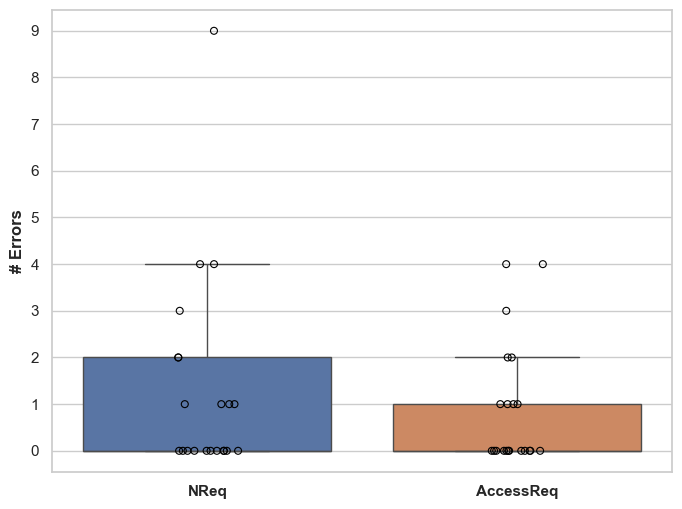

In [118]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_estudo3, x='Request', y='Total', hue='Request', showfliers=False)
sns.stripplot(data=df_estudo3, x='Request', y='Total', palette=color_dict_request, hue='Request', edgecolor='black', linewidth=.8)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.xticks(fontweight='bold', fontfamily='Arial')
plt.ylabel('# Errors', fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

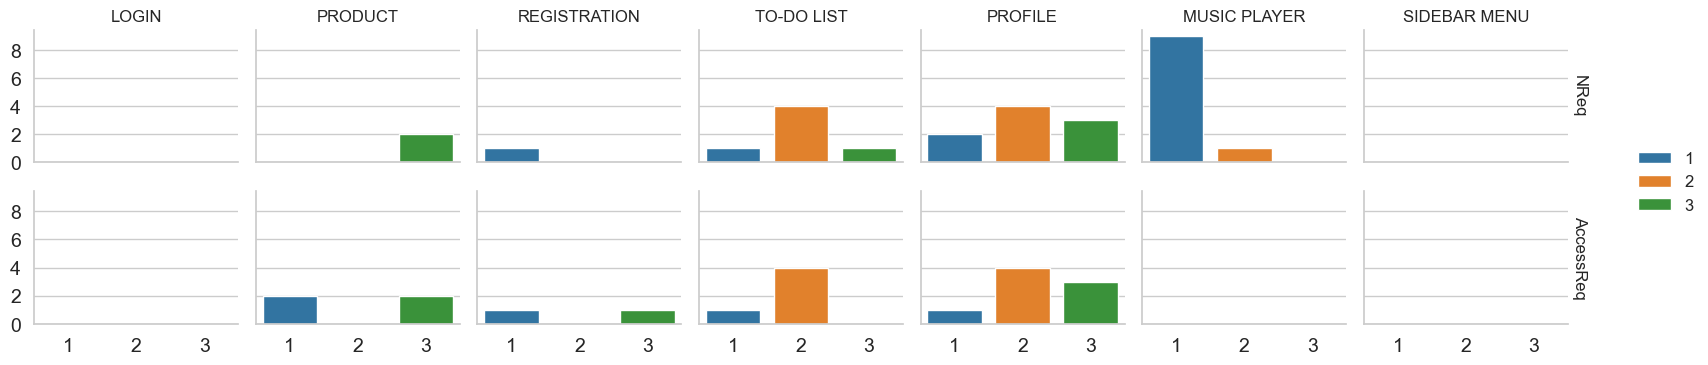

In [128]:
# Criando o grid de gráficos de barras
g = sns.FacetGrid(df_estudo3, row="Request", col="Screen", margin_titles=True, height=2, aspect=1.2)
g.map_dataframe(sns.barplot, x="Prompt", y="Total", hue="Prompt", palette=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, symmetric=True))

# Ajustando a legenda
g.add_legend(title="", title_fontsize='13', prop={'size': 12})


# Ajustando os títulos dos eixos
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Ajustando a rotação dos rótulos do eixo x
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
        label.set_fontsize(14)
    for label in ax.get_yticklabels():
        label.set_fontsize(14)

# Ajustando o layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('')
# Exibindo o gráfico
plt.show()

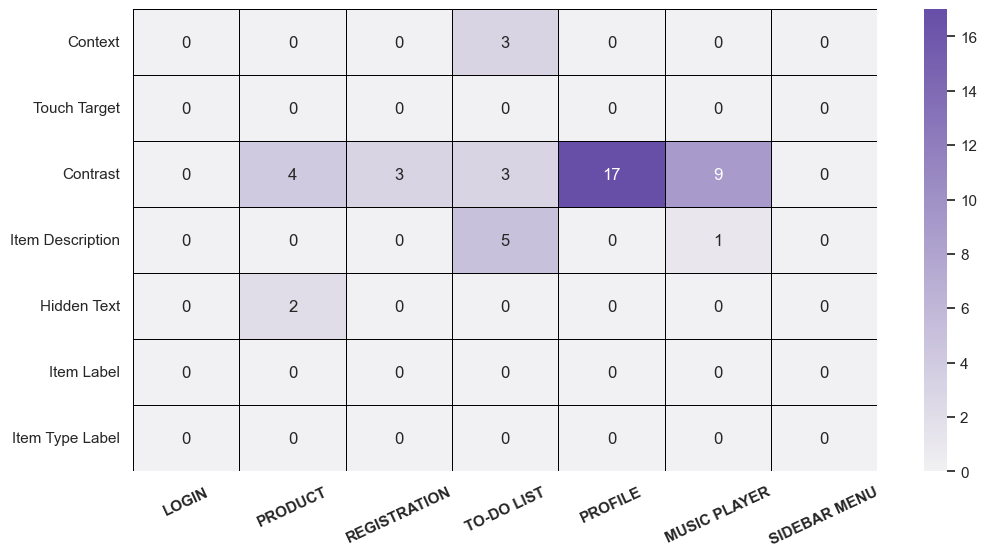

In [115]:
data3 = df_estudo3.pivot_table(index='Screen', values=['Context', 'Touch Target', 'Contrast', 'Item Description', 'Hidden Text', 'Item Label', 'Item Type Label'], aggfunc='sum', sort=False)

plt.figure(figsize=(12, 6))
sns.heatmap(data3.T, annot=True, fmt='d', cmap=sns.light_palette("#674ea7", as_cmap=True), linewidths=.5, linecolor='black')
plt.title('')
plt.xlabel('')
plt.xticks(fontweight='bold', rotation=25)
plt.show()

## Estudo 4

In [52]:
df_estudo4 = df[df['Study'] == 'Study 4']
df_estudo4.head()

,Study,LLM,Request,Prompt,Screen,Layout,Context,Touch Target,Contrast,Item Description,Text Size,Hidden Text,Item Label,Item Type Label,Editable Item Label,Clickable Item,Total
246,Study 4,GitHub Copilot,NReq,1,LOGIN,Chat-JCR,2,0,2,0,0,0,0,0,0,0,4
247,Study 4,GitHub Copilot,NReq,2,LOGIN,Chat-JCR,1,0,0,0,0,0,0,0,0,0,1
248,Study 4,GitHub Copilot,NReq,3,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
249,Study 4,GitHub Copilot,AccessReq,1,LOGIN,Chat-JCR,2,0,0,0,0,0,0,0,0,0,2
250,Study 4,GitHub Copilot,AccessReq,2,LOGIN,Chat-JCR,1,0,0,0,0,0,0,0,0,0,1


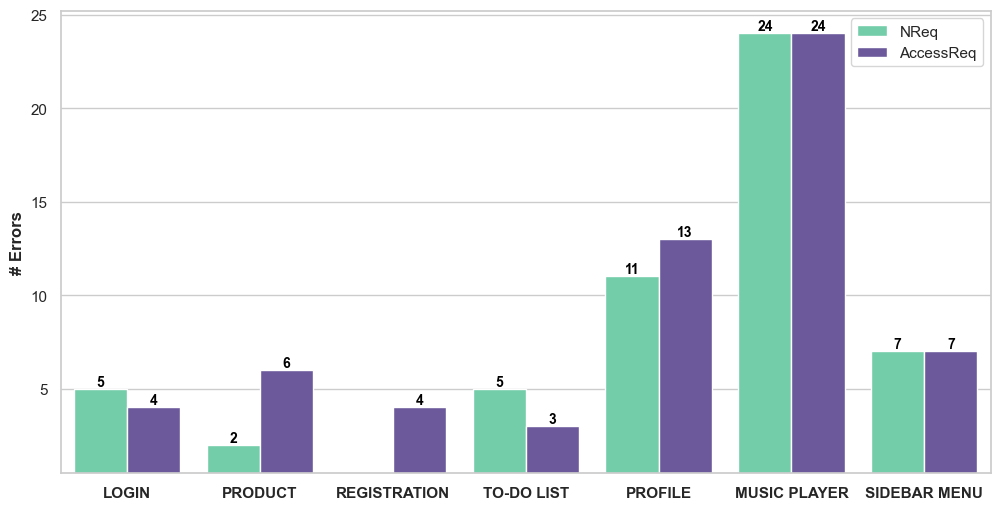

In [53]:
df_t4 = df_estudo4.groupby(['Request', 'Screen'])['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_t4, x='Screen', y='Total', hue='Request', palette=['#63dcab', '#674ea7'], order=order_screen, hue_order=order_request)

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=10, color='black', fontweight='bold',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto

# Ajustando os limites do eixo y
ax.set_ylim(0.5, ax.get_ylim()[1])

plt.xlabel('')
plt.ylabel('# Errors', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.legend(title='')
plt.show()

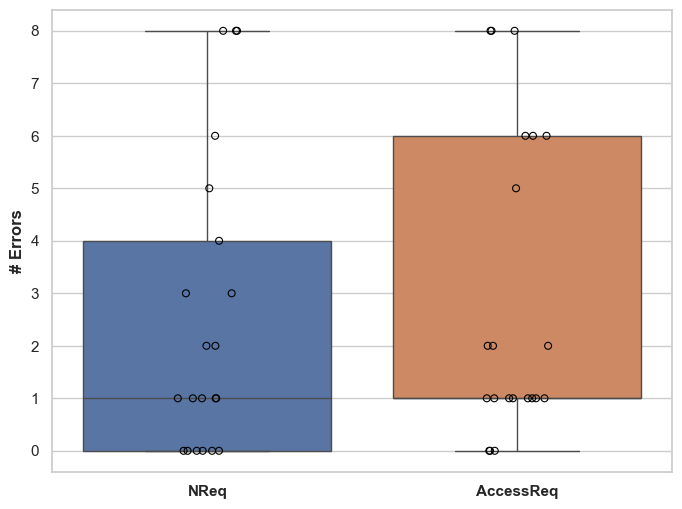

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_estudo4, x='Request', y='Total', hue='Request', showfliers=False)
sns.stripplot(data=df_estudo4, x='Request', y='Total', palette=color_dict_request, hue='Request', edgecolor='black', linewidth=.8)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.xticks(fontweight='bold', fontfamily='Arial')
plt.ylabel('# Errors', fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

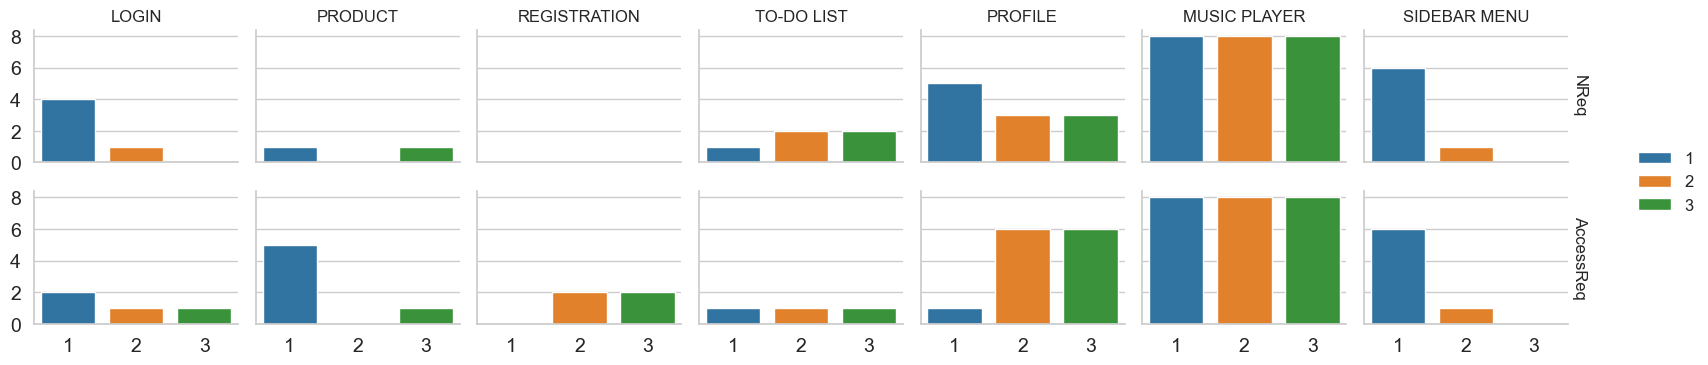

In [129]:
# Criando o grid de gráficos de barras
g = sns.FacetGrid(df_estudo4, row="Request", col="Screen", margin_titles=True, height=2, aspect=1.2)
g.map_dataframe(sns.barplot, x="Prompt", y="Total", hue="Prompt", palette=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, symmetric=True))

# Ajustando a legenda
g.add_legend(title="", title_fontsize='13', prop={'size': 12})

# Ajustando os títulos dos eixos
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Ajustando a rotação dos rótulos do eixo x
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
        label.set_fontsize(14)
    for label in ax.get_yticklabels():
        label.set_fontsize(14)

# Ajustando o layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('')
# Exibindo o gráfico
plt.show()

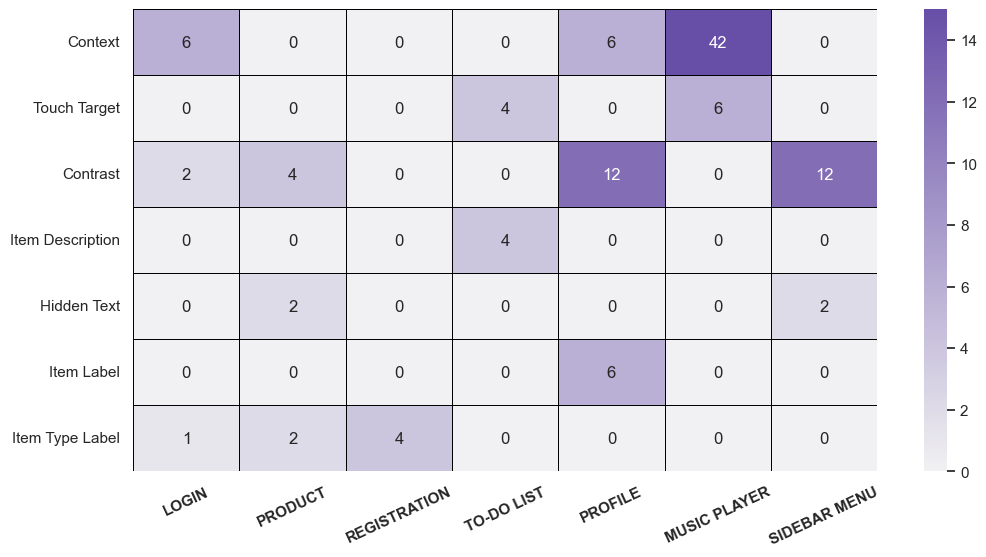

In [117]:
data4 = df_estudo4.pivot_table(index='Screen', values=['Context', 'Touch Target', 'Contrast', 'Item Description', 'Hidden Text', 'Item Label', 'Item Type Label'], aggfunc='sum', sort=False)

plt.figure(figsize=(12, 6))
sns.heatmap(data4.T, annot=True, fmt='d', cmap=sns.light_palette("#674ea7", as_cmap=True), linewidths=.5, linecolor='black', vmax=15)
plt.title('')
plt.xlabel('')
plt.xticks(fontweight='bold', rotation=25)
plt.show()

## Todos os estudos

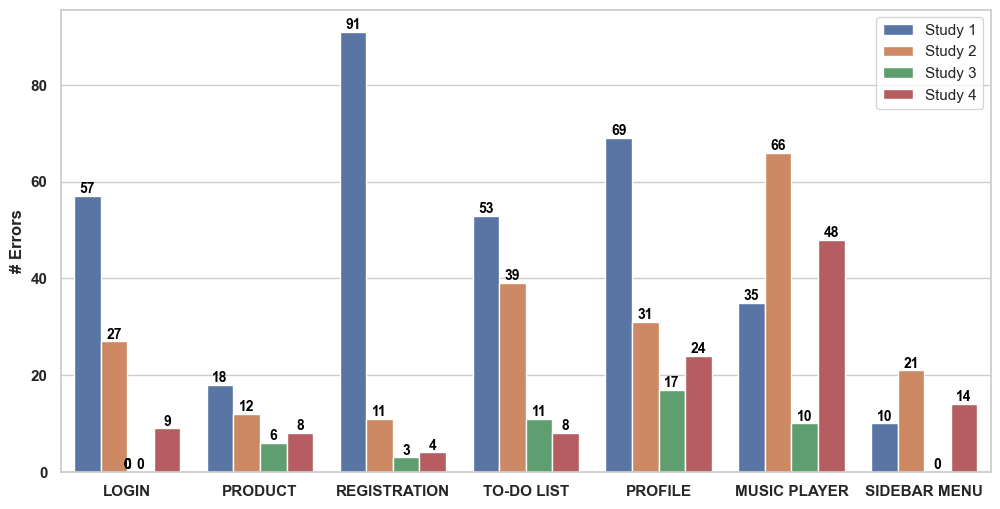

In [130]:
# Agrupando os dados por 'Study' e somando os totais de 'Total'
df_total = df.groupby(['Study', 'Screen'])['Total'].sum().reset_index()

# Criando o gráfico de barras com os totais corrigidos
plt.figure(figsize=(12, 6))
ad = sns.barplot(data=df_total, x='Screen', y='Total', hue='Study', order=order_screen)

# Adicionando os valores no topo de cada barra com formatação como inteiros
for p in ad.patches:
    ad.annotate(f'{int(p.get_height())}',  # Exibe o valor correto no topo da barra
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=10, fontfamily='Arial', fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto
    
# Ajustando os limites do eixo y
# ad.set_ylim(0.5, ad.get_ylim()[1])

plt.xlabel('')
plt.ylabel('# Errors', fontsize=12, fontweight='bold', fontfamily='Arial')
plt.xticks(fontweight='bold', fontfamily='Arial')
plt.yticks(fontweight='bold', fontfamily='Arial')
plt.legend(title='')
plt.show()

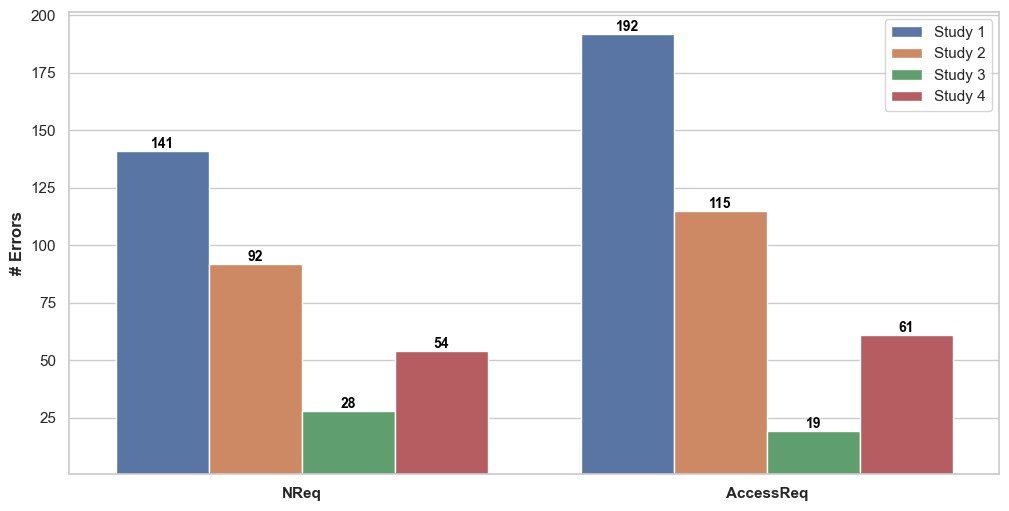

In [131]:
# Agrupando os dados por 'Study' e somando os totais de 'Total'
df_total_req = df.groupby(['Study', 'Request'])['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
ad = sns.barplot(data=df_total_req, x='Request', y='Total', hue='Study', order=['NReq', 'AccessReq'])

# Adicionando os valores no topo de cada barra com formatação como inteiros
for p in ad.patches:
    ad.annotate(f'{int(p.get_height())}',  # Exibe o valor correto no topo da barra
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=10, fontfamily='Arial', fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto
    
# Ajustando os limites do eixo y
ad.set_ylim(0.5, ad.get_ylim()[1])

plt.xlabel('')
plt.xticks(fontweight='bold', fontfamily='Arial')
plt.ylabel('# Errors', fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='')
plt.show()

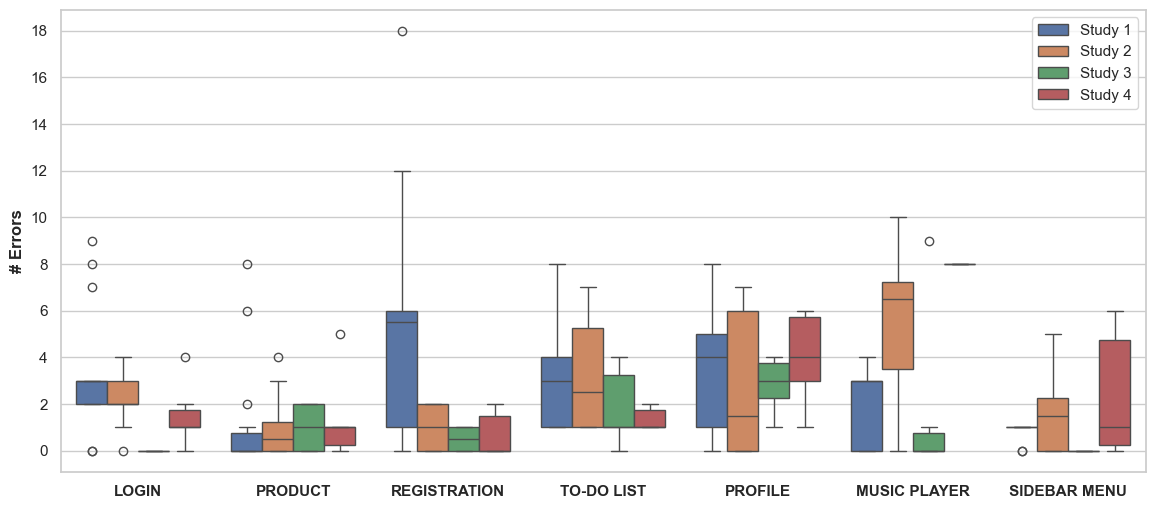

In [57]:
color_dict_study = {'Study 1': to_rgba('red', 0),
                    'Study 2': to_rgba('red', 0),
                    'Study 3': to_rgba('red', 0),
                    'Study 4': to_rgba('red', 0)}

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Screen', y='Total', hue='Study')

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.xticks(fontweight='bold', fontfamily='Arial')
plt.ylabel('# Errors', fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='')
plt.show()

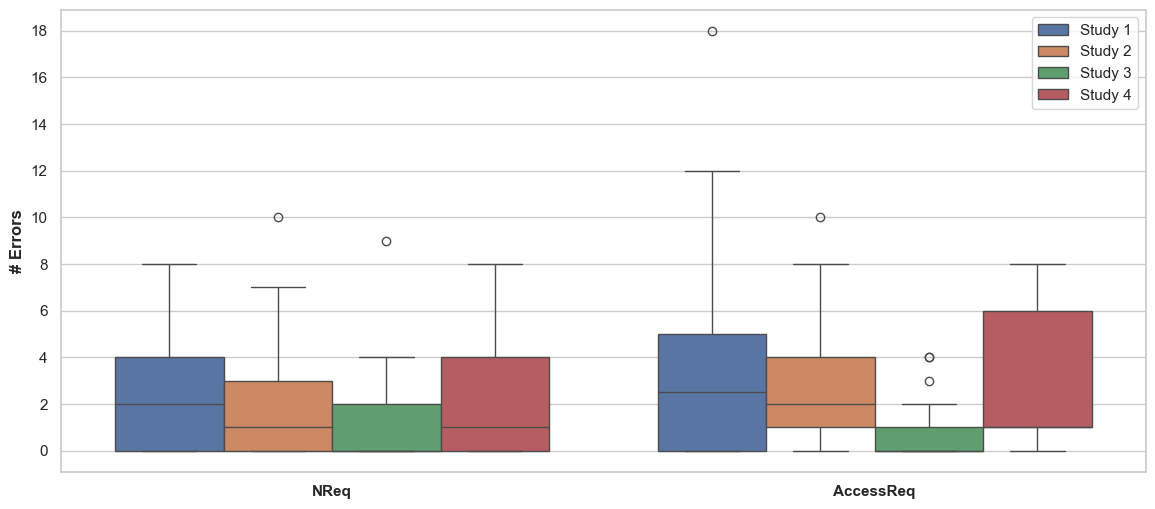

In [58]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Request', y='Total', hue='Study')

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.xticks(fontweight='bold', fontfamily='Arial')
plt.ylabel('# Errors', fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='')
plt.show()

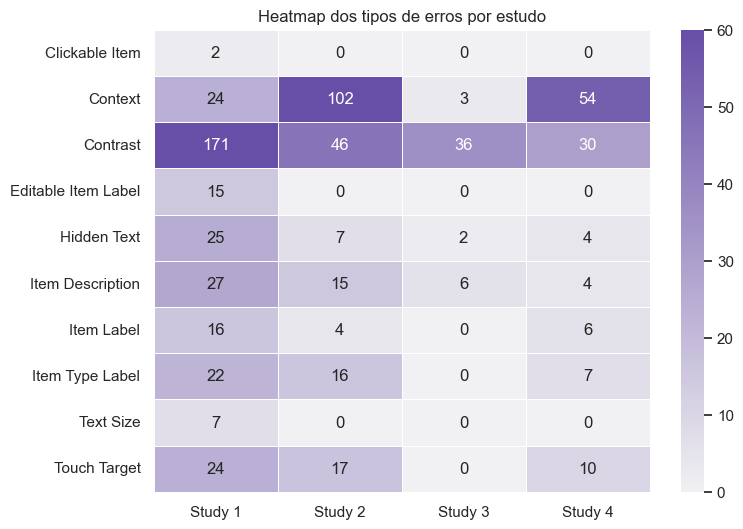

In [59]:
data = df.pivot_table(index='Study', values=['Context', 'Touch Target', 'Contrast', 'Item Description', 'Text Size', 'Hidden Text', 'Item Label', 'Item Type Label', 'Editable Item Label', 'Clickable Item'], aggfunc='sum')

# Criar o heatmap com eixos invertidos
plt.figure(figsize=(8, 6))
sns.heatmap(data.T, annot=True, fmt='d', cmap=sns.light_palette("#674ea7", as_cmap=True), linewidths=.5, vmax=60)
plt.title('Heatmap dos tipos de erros por estudo')
plt.xlabel('')
plt.show()

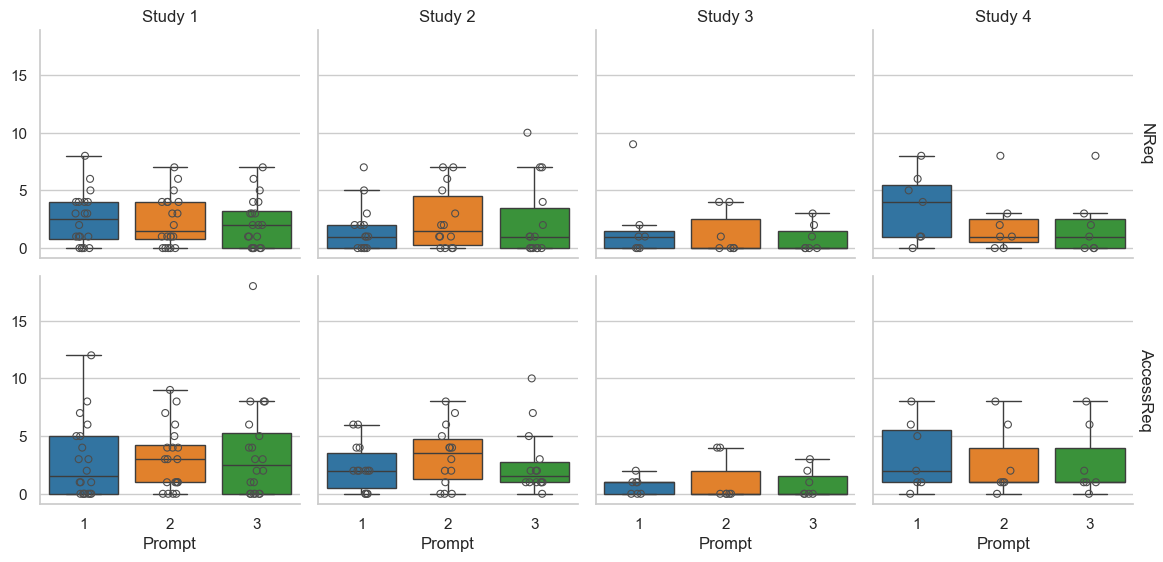

In [60]:
grid = sns.FacetGrid(df, row='Request', col='Study', margin_titles=True)
grid.map_dataframe(sns.boxplot, x='Prompt', y='Total', hue='Prompt', palette=['#1f77b4', '#ff7f0e', '#2ca02c'], showfliers=False)
grid.map_dataframe(sns.stripplot, x='Prompt', y='Total', hue='Request', palette=color_dict_request, edgecolor='auto', linewidth=.8)

grid.set_axis_labels("Prompt", "")
grid.set_titles(col_template="{col_name}", row_template="{row_name}")
# Ajustando o layout
plt.subplots_adjust(top=0.9)
plt.show()